In [ ]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pylab as plt
import numpy as np

#Osciladores Amortiguados. Sistema masa - resorte.

Se modelarán varios casos, uno en el cuál la masa oscila con movimiento armonico simple, otro en el que esta misma masa se ve alterada al estar en presencia de una fuerza de fricción y en el último caso se tendrá una recopilación de los anteriores, solo que esa energía que se pierde por fricción será compensada por una fuerza forzante y externa.

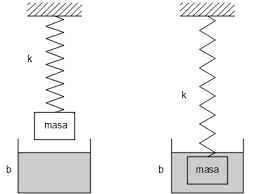

Consideremos una masa atada a un resorte cuyo movimiento es oscilatoio alrededor de un punto de equilibrio ($P.E$) y la cual No siente la presencia de una fuerza de fricción viscosa ($f_f$) Ni de una fuerza que compense el movimiento que se pierde por fricción.
Cuando no se presenta fricción, dada una fuerza inicial, el sistema oscila sin cambio con una amplitud constante alrededor de un punto de equilibrio; a esto último lo llamamamos movimiento armónico simple (M.A.S).


#Por la segunda ley de Newton, la ecuación de movimiento es de la forma:

#M.A.S

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2} + \omega_0^2 x = 0\, \ \ \ (1)
\end{equation}

#donde,

* $w$: es la frecuencia natural a la que oscila el sistema.


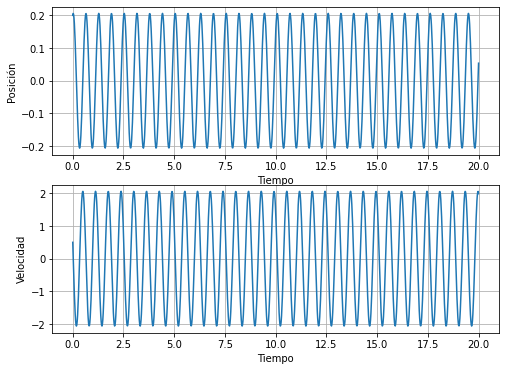

In [ ]:
# ω_o: Frecuencia natural del sistema
def f(x, t, p):
  
  dxdt = x[1] #dxdt=v
  dvdt = - (ω_o ** 2) * x[0]

  return [dxdt, dvdt]

#======================================
# Dominio de integracion, tiempo 
t = np.linspace(0, 20, 1000) # Dominio de integracion
#======================================

#=============================
# Condiciones iniciales
#=============================
#Posicion inicial 
xo = 0.2  # Unidades *
vo = 0.5  # rapidez inicial.
X0 = np.array([xo, vo]) 
ω_o=10 
p = ω_o

X = odeint(f, X0, t, args = (ω_o, ) )

pos1x = X[:,0]
velx = X[:,1]

plt.figure(figsize=(8, 6))

plt.subplot(211)
plt.plot(t, pos1x)
plt.ylabel("Posición")
plt.xlabel("Tiempo")
plt.grid()

plt.subplot(212)
plt.plot(t, velx)
plt.ylabel("Velocidad")
plt.xlabel("Tiempo")
plt.grid()
plt.show()

#OSCILADORES AMORTIGUADOS

Consideremos ahora la misma masa atada a un resorte cuyo movimiento es oscilatoio alrededor de un punto de equilibrio ($P.E$), pero que ahora está en presencia de una fuerza de fricción viscosa ($f_f$). La ecuación diferencial que modela este caso se muestra a continuación:

$$ \frac{d^2x}{dt^2}+\gamma\frac{dy}{dt}+w^2{x}=0\, \ \ \ (2) $$ 

#Donde,

* $w$: es la frecuencia del sistema.
$w=\sqrt(\frac{k}{m})$
* $k$: es la constante del resorte
* $m$: es la masa del resorte
* $\gamma$: es el coeficiente de amortiguamiento. $\gamma$ = $\frac{b}{m}$
* $b$: coeficiente de fricción del líquido viscoso

Es importante tener en cuenta para este caso, tres situaciones que se pueden presentar:


1.  Si $\gamma$ > $w_o$, entonces se tendrá sobreamortiguamiento.
2.  Si  $\gamma$ = $w_o$, entonces se tendrá amortiguamiento crítico.
3.  Si $\gamma$ < $w_o$, entonces se tendrá amortiguamiento débil.





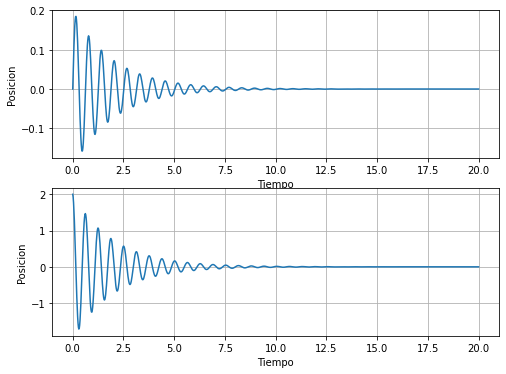

In [ ]:
# ω_o: Frecuencia natural del sistema
def f(x, t, p):
  ω_0 = p[0] #Frecuencia natural del sistema
  γ   = p[1] #Coeficeinte de amortiguamiento

  dxdt = x[1] #dxdt=v
  dvdt = - γ * x[1] - (ω_o ** 2) * x[0]

  return [dxdt, dvdt]

#======================================
# Dominio de integracion, tiempo 
t = np.linspace(0, 20, 1000) # Dominio de integracion
#======================================

#=============================
# Condiciones iniciales
#=============================
#Posicion inicial 
xo = 0  # Unidades 
vo = 2  # rapidez inicial.
X0 = np.array([xo, vo])  

ω_0 = 10    #Frecuencia natural, 
γ    = 1.0  #Coeficiente de amotiguamiento

p = ( ω_0, γ)

X = odeint(f, X0, t, args = (p, ) )

pos2x = X[:,0]
velx = X[:,1]

#def e(t):
  #return np.exp((-γ/2)*t)

#def E(t):
  #return -np.exp((-γ/2)*t)

plt.figure(figsize=(8, 6))

plt.subplot(211)
plt.plot(t, pos2x)
#plt.plot(t, e(t))
#plt.plot(t, E(t))
plt.ylabel("Posicion")
plt.xlabel("Tiempo")
plt.grid()

plt.subplot(212)
plt.plot(t, velx)
plt.ylabel("Posicion")
plt.xlabel("Tiempo")
plt.grid()
plt.show()


#OSCILADOR FORZADO

$$ \frac{d^2y}{dt^2}+\gamma\frac{dy}{dt}+w^2{y}=A \sin\omega t\, \ \ \ (3) $$ 

#Donde,

* $w$: es la frecuencia del sistema.
$w=\sqrt(\frac{k}{m})$
* $k$: es la constante del resorte
* $m$: es la masa del resorte
* $\gamma$: es el coeficiente de amortiguamiento. $\gamma$ = $\frac{b}{m}$
* $b$: coeficiente de fricción del líquido viscoso
* $A\sin\omega t$ es la forma de la fuerza forzante

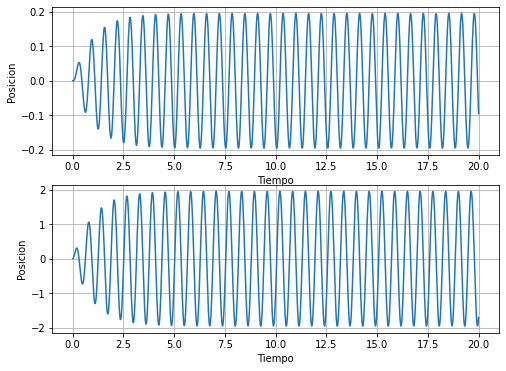

In [ ]:
#p: parámetros
def f(x, t, p):
  ω_0 = p[0] #Frecuencia natural del sistema
  γ   = p[1] #Coeficeinte de amortiguamiento
  A0  = p[2] #amplitud del agente externo
  ω   = p[3] #frecuencia del forzamiento

  dxdt = x[1] #dxdt=v
  dvdt = A0 * np.sin(ω * t) - (ω_0 ** 2) * x[0] - γ * x[1]

  return [dxdt, dvdt]

#======================================
# Dominio de integracion, tiempo 
t = np.linspace(0, 20, 1000) # Dominio de integracion
#======================================

#=============================
# Condiciones iniciales
#=============================
#Posicion inicial 
xo = 0.0  # Unidades *
vo = 0.0  # rapidez inicial.
X0 = np.array([xo, vo])  

ω_0 = 10    #Frecuencia natural, 
γ    = 2.0  #Coeficiente de amotiguamiento
A0   = 3.9 #Amplitud del forzamiento 
ω = 10 #frecuencia del forzamiento


p = ( ω_0, γ, A0, ω)

X = odeint(f, X0, t, args = (p, ) )

pos3x = X[:,0]
velx = X[:,1]

plt.figure(figsize=(8, 6))

plt.subplot(211)
plt.plot(t, pos3x)
plt.ylabel("Posicion")
plt.xlabel("Tiempo")
plt.grid()

plt.subplot(212)
plt.plot(t, velx)
plt.ylabel("Posicion")
plt.xlabel("Tiempo")
plt.grid()
plt.show()

A continuacón se presenta gráficamente la comparación de los diferentes casos mencionados anteriormente.

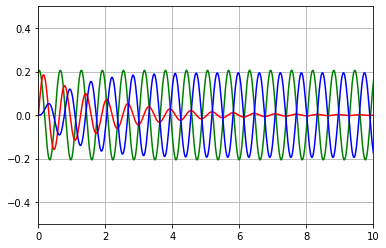

In [ ]:
plt.plot(t, pos1x, "g-", label="M.A.S")
plt.plot(t, pos2x, "r-", label="Amortiguado" )
plt.plot(t, pos3x, "b-", label="Forzado")
plt.xlim(0,10)
plt.ylim(-0.5,0.5)
plt.grid()
plt.show()

#FENÓMENO DE RESONANCIA

Hay resonancia cuando la oscilación alcanza su mayor amplitud, lo que ocurre cuando la frecuencia de la fuerza externa ($ω$) es cercana a la frecuencia natural del sistema ($ω_o$). Cuando el sistema está en resonacia y se puede asumir que el amortiguamiento es suficientemente débil para que se cumpla que: $$\gamma\ << ω_o\$$ se puede decir que $ω \approx ω_o$.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


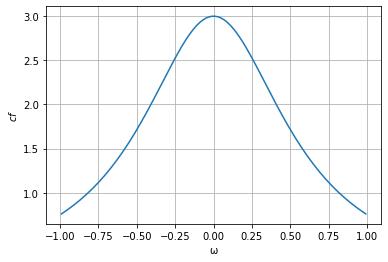

In [ ]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pylab as plt
import numpy as np

def cf (ω, γ = 2, G0 = 3, ω_0 = 1 ):
  return G0/(np.sqrt((ω_0)**2-(ω)**2)**2+(γ*ω)**2)

ω = np.linspace(-10, 10, 1000) # Dominio de integracion

plt.plot(ω, cf(ω))
plt.ylabel("$cf$")
plt.xlabel("ω")
plt.grid()

#Amplitudes Elástica y Absorbente

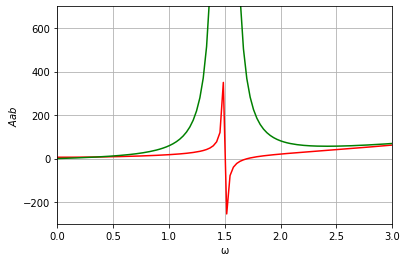

In [ ]:
#Definamos la amplitud absorbente
def Aab (ω):
  Δ_0f = ((ω_0)**2)-((ω)**2)
  T1 = G0*γ*ω
  T2 = (ω*γ)**2
  return T1/((Δ_0f)**2)+T2

#Definamos la amplitud elástica
def Ael (ω):
  Δ_0f = (ω_0)**2-(ω)**2
  U1 = G0*(Δ_0f)
  U2 = (ω*γ)**2
  return U1/(Δ_0f**2)+U2

def g(ω):
  return G0/γ*ω

G0 = 6
γ = 4
ω_0 = 1

ω = np.linspace(-10, 10, 1000) # Dominio de integracion

plt.plot(g(ω), Ael(ω), "r-", label="Ael")
plt.plot(g(ω), Aab(ω), "g-", label="Aab")
plt.xlim(0,3)
plt.ylim(-300,700)
plt.ylabel("$Aab$")
plt.xlabel("ω")
plt.grid()

In [ ]:
#La roja es la elastica